# ADAGRAD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

In [3]:
load_data = pd.read_excel(r"C:\Users\SAIDEEPTHI\Downloads\Load Data in kW (1) (1).xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [4]:
type(load_data)

pandas.core.frame.DataFrame

In [5]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)

In [6]:
data.head()

,load
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [7]:
data.shape

(2183, 1)

In [8]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [10]:
data.corr()

,load
load,1.0


# VALIDATING NULL VALUE

In [11]:
data.isnull().sum()

load    0
dtype: int64

# VISUALISING OUTLIERS OF DATA

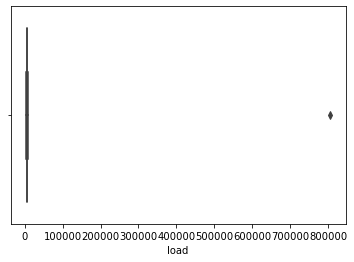

In [12]:
sns.boxplot(x=data['load'])

In [13]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928], dtype=int64),)


From boxplot and from above zscore calculation, we can conclude that there is one outliner. lets replace it.

In [14]:
data.iloc[928,0] = data.iloc[927,0]

AFTER REPLACING THE OUTLIER

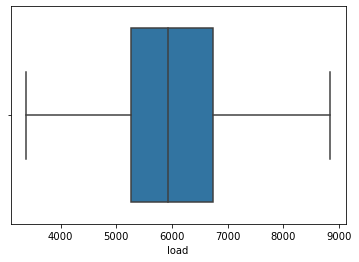

In [16]:
sns.boxplot(x=data['load'])

now all outliners are removed and now we are good to train the model

In [17]:
data_x = []
data_y = []
for i in range(0,len(data)-(24*7)):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+(24*7),0])

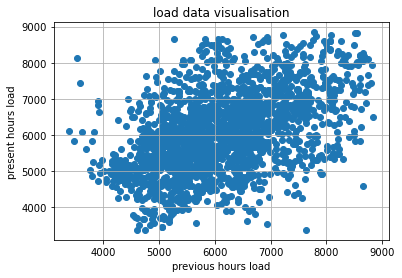

In [19]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()

In [20]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3381.1930800000005
3377.9196
8841.66948
8841.66948


# DATA NORMALISATION

In [21]:
x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [22]:
data_norm = []
for i in range(len(data)-24*7):
  data_norm.append([x[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1
0,0.293377,0.322302
1,0.276021,0.286040
2,0.309820,0.254087
3,0.332401,0.300562
4,0.413902,0.404639
...,...,...
2010,0.499943,0.228524
2011,0.536940,0.217797
2012,0.622923,0.246298
2013,0.489837,0.324384


# SPLITTING DATA SET

In [23]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [24]:
data_norm.head()

,0,1
0,0.293377,0.322302
1,0.276021,0.286040
2,0.309820,0.254087
3,0.332401,0.300562
4,0.413902,0.404639


In [25]:
data_x = np.array(data_train[0])

In [26]:
data_y = np.array(data_train[1])

In [27]:
len(data_x)

1813

In [28]:
len(data_test)

202

TRAINING THE MODEL

In [29]:
# initalising required variables
max_iters=2000
m=1.0
c=-1.0
Gm=0.0
Gc=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dc=0.0
iter=1
error=[]

In [35]:
err=0.0
for i in range(len(data_x)):
    gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
    gc=-1*(data_y[i]-(m*data_x[i])-c)
    err+=(data_y[i]-m*data_x[i]-c)**2
    Gm = Gm + (gm**2)
    Gc = Gc + (gc**2) 
    r1 = math.sqrt(Gm + exp)
    r2 = math.sqrt(Gc + exp)
    dm = -1*(alpha/r1)*gm
    dc = -1*(alpha/r2)*gc
    m = m + dm
    c = c + dc
error.append(err/(2*len(data_x)))
iter=iter+1

In [36]:
len(error)

2002

In [37]:
iters = np.arange(max_iters)

In [38]:
from sklearn.metrics import mean_squared_error

In [40]:
pred = []
for i in range(len(data_train)):
    pred.append(m*data_x[i] + c)

In [41]:
mse_train = mean_squared_error(data_y,pred)

In [42]:
data_test

,0,1
942,0.572481,0.339791
782,0.982272,0.867165
1141,0.401770,0.638983
1598,0.461462,0.300562
1446,0.275735,0.361331
...,...,...
103,0.580103,0.615104
1605,0.432800,0.322302
1955,0.397945,0.618356
376,0.954011,0.706513


In [43]:
pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

# MEAN SQUARED ERRORS

In [44]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.02941004660889115
Testing data mean squared error: 0.035512173739460355


In [45]:
print("model parameter:",m,c)

model parameter: 0.5169231350863193 0.2240626560196721


VISUALISING TRAINING DATA

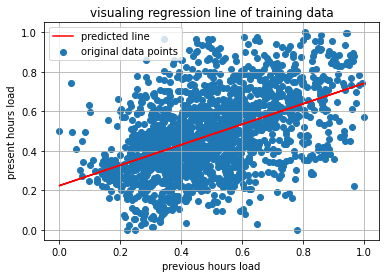

In [46]:
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()
plt.show()

VISUALISING TESTING DATA

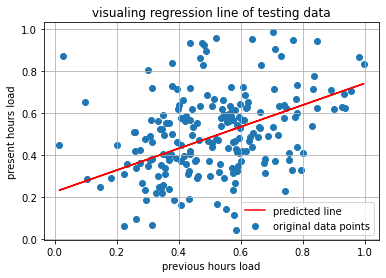

In [47]:
plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()
plt.show()

DEPLOYMENT OF MODEL

In [49]:
input_load = float(input("enter load at this time : "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour at next week is : ",output_load)

enter load at this time : 4983.17184
predicted load for this hour at next week is :  5430.7382273154235
